In [1]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 1. F 분포
* F 분포 : 카이 제곱 분포를 따르는 독립적인 두 개의 확률변수 $Χ_1^2(x;N_1)$와 $Χ_2^2(x;N_2)$의 확률변수 표본을 각각 $x_1, x_2$이라고 할 때,  
이를 각각 $N1, N2$로 나눈 뒤 비율
    * $F(x; N_1, N_2)$로 표기
    * $N_1, N_2$ : F 분포의 자유도 모수
$$ x_1, x_2 ∼ Χ^2 → \frac{x_1/N_1}{x_2/N_2} ∼ F(x; N_1, N_2) $$

#### 확률밀도함수
$$ f(x;N_1, N_2) = \frac{\sqrt{\frac{(N_1x)^{N_1}N_2^{N_2}}{(N_1x + N_2)^{N_1+N_2}}}}{xB(\frac{N_1}{2}, \frac{N_2}{2})} $$
    * $B(x)$ : 베타(beta) 함수라는 특수함수
    
##### f
F 분포를 구현한다.

#### 몇 가지 자유도 쌍에 대한 F 분포

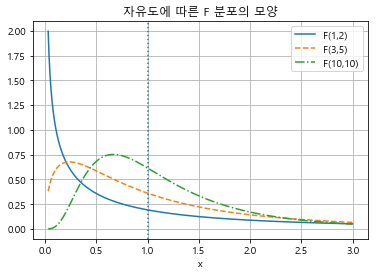

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

xx = np.linspace(0.03, 3, 1000)
plt.plot(xx, sp.stats.f(1, 2).pdf(xx), ls="-", label="F(1,2)")
plt.plot(xx, sp.stats.f(3, 5).pdf(xx), ls="--", label="F(3,5)")
plt.plot(xx, sp.stats.f(10, 10).pdf(xx), ls="-.", label="F(10,10)")
plt.axvline(1, ls=":")
plt.xlabel("x")
plt.title("자유도에 따른 F 분포의 모양")
plt.legend()
plt.grid()
plt.show()

#### F 분포의 특이한 점
$N_1$과 $N_2$의 값이 같을 경우 1 근처의 값이 가장 많이 발생할 것이라는 직관과 달리 1이 아닌 다른 수가 더 흔하게 발생한다.

#### 시뮬레이션을 통한 실제로 제곱합의 비율의 분포 살펴보기

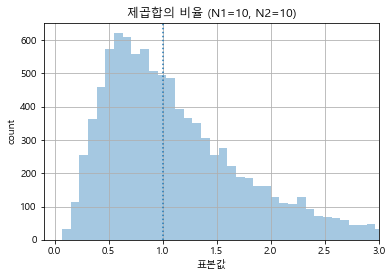

In [12]:
import seaborn as sns

np.random.seed(0)

rv = sp.stats.norm()
M = 10000

N1 = 10
x1 = rv.rvs((N1, M))
t1 = (x1 ** 2).sum(axis=0)

N2 = 10
x2 = rv.rvs((N2, M))
t2 = (x2 ** 2).sum(axis=0)

t = t2 / t1
sns.distplot(t, bins=200, kde=False)
plt.axvline(1, ls=":")
plt.xlim(-0.1, 3)
plt.title("제곱합의 비율 (N1=10, N2=10)")
plt.xlabel("표본값")
plt.ylabel("count")
plt.grid()
plt.show()

# 2. 스튜던트 t 분포와의 관계
스튜던트 t 분포의 표본값을 제곱한 값은 F-분포를 따른다.
$$ t(N)^2 = F(1, N) $$

## 연습 문제
$N$이 다음과 같을 때 스튜던트 t 분포에서 나온 값의 제곱이 이루는 분포를 시뮬레이션으로 구하고 그 히스토그램 $(1, N)$-자유도의 F-분포와 비교하라.
1. $N = 2$일 때

2. $N = 30$일 때